<a href="https://colab.research.google.com/github/janethuang1027/Fraud-Detection-in-Credit-Card-Transactions/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
drive.mount('/content/gdrive')
transactions = pd.read_csv("/content/gdrive/My Drive/code_files/taishin/credit_card_transactions-ibm_v2.csv")
cards = pd.read_csv("/content/gdrive/My Drive/code_files/taishin/sd254_cards.csv")
#users = pd.read_csv("/content/gdrive/My Drive/code_files/taishin/sd254_users.csv")
#User0_trans = pd.read_csv("/content/gdrive/My Drive/code_files/taishin/User0_credit_card_transactions.csv")

Mounted at /content/gdrive


## Data Understanding & Preprocessing

In [ ]:
transactions[transactions['Merchant State'].isnull()]['Merchant City'].value_counts()
# Fill missing values in 'Merchant State' with 'ONLINE'
transactions['Merchant State'].fillna('ONLINE', inplace=True)

# Zip code --> string
transactions['Zip'] = transactions['Zip'].astype('str').replace('nan', np.nan)
# Fill missing values in 'Zip' with 'ONLINE'
transactions['Zip'].fillna('ONLINE', inplace=True)

# Fill missing value in 'Errors? with ''Transaction Successful'
transactions['Errors?'].fillna('Transaction Successful', inplace=True)

transactions['Year'] = pd.to_datetime(transactions['Year'], format='%Y').dt.year
transactions['Month'] = pd.to_datetime(transactions['Month'], format='%m').dt.month
transactions['Day'] = pd.to_datetime(transactions['Day'], format='%d').dt.day
transactions['Time'] = pd.to_datetime(transactions['Time'], format='%H:%M').dt.hour
# Amount --> float
transactions['Amount'] = transactions['Amount'].replace('[\$,]', '', regex=True).astype(float)
transactions['Merchant Name'] = transactions['Merchant Name'].astype('str')


In [ ]:
transactions['Is Fraud?'] = transactions['Is Fraud?'].apply(lambda x: 1 if x == 'Yes' else 0)
fraud_data = transactions[transactions['Is Fraud?'] == 1]

In [ ]:
# Invalid variable
cards['Card on Dark Web'].value_counts()
cards = cards.drop(columns=['Card on Dark Web'])
cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User                   6146 non-null   int64 
 1   CARD INDEX             6146 non-null   int64 
 2   Card Brand             6146 non-null   object
 3   Card Type              6146 non-null   object
 4   Card Number            6146 non-null   int64 
 5   Expires                6146 non-null   object
 6   CVV                    6146 non-null   int64 
 7   Has Chip               6146 non-null   object
 8   Cards Issued           6146 non-null   int64 
 9   Credit Limit           6146 non-null   object
 10  Acct Open Date         6146 non-null   object
 11  Year PIN last Changed  6146 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 576.3+ KB


In [ ]:
# Converting scientific notation to float format
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Now, when you describe the data, it will display as normal floats or integers
description = transactions['Is Fraud?'].describe()
print(description)

count   24386900.00000
mean           0.00122
std            0.03491
min            0.00000
25%            0.00000
50%            0.00000
75%            0.00000
max            1.00000
Name: Is Fraud?, dtype: float64


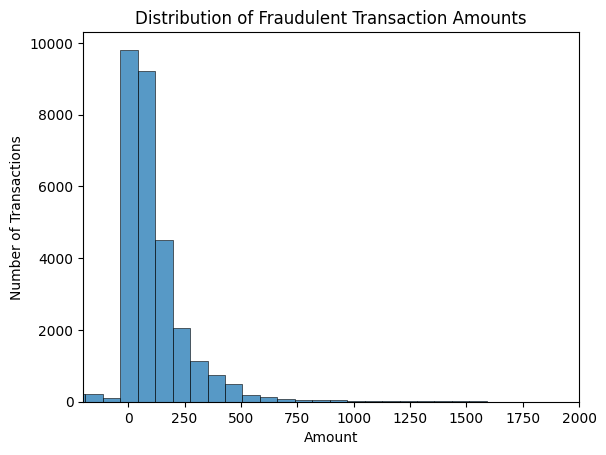

In [ ]:
sns.histplot(fraud_data['Amount'], kde=False, bins=80)
plt.title('Distribution of Fraudulent Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim(-200, 2000)

plt.show()

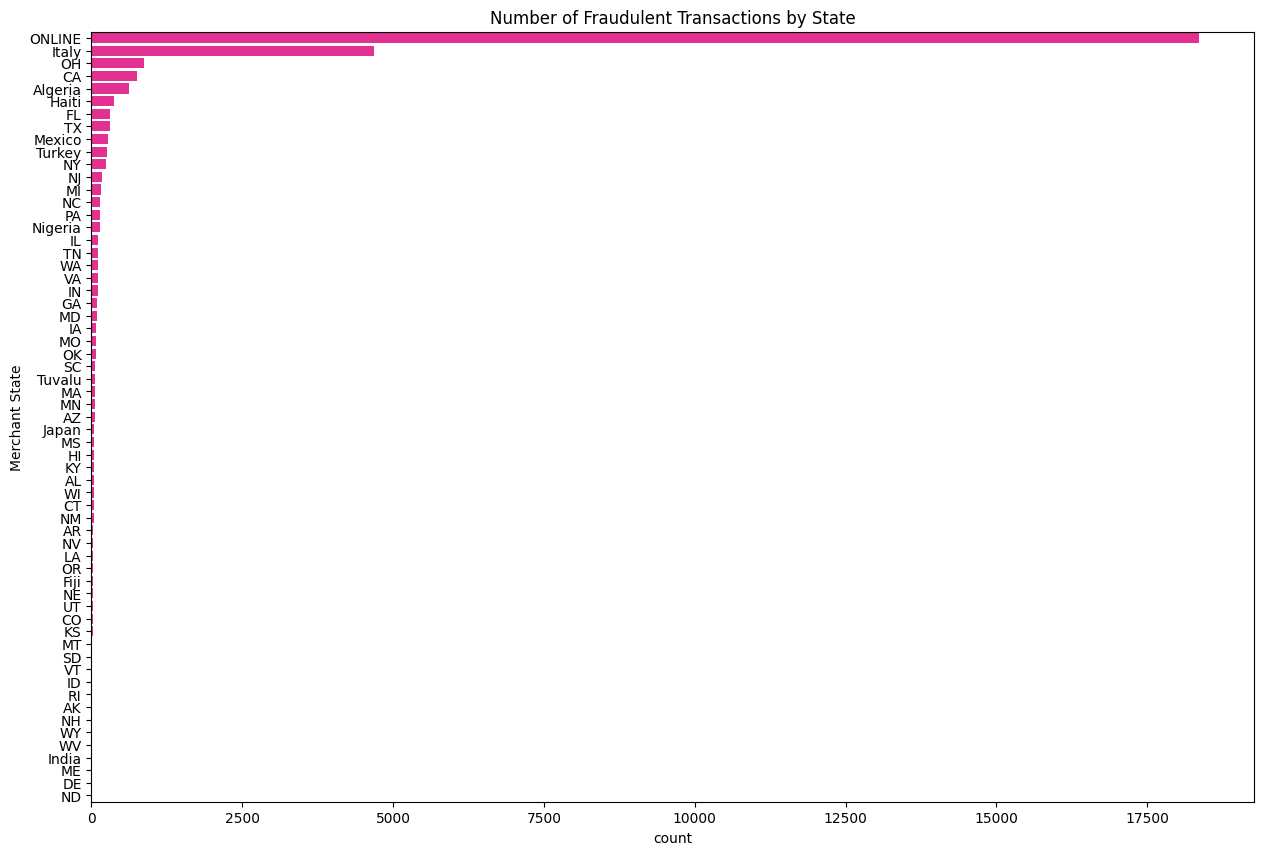

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(data=fraud_data, y='Merchant State', order=fraud_data['Merchant State'].value_counts().index, color='deeppink')
plt.title('Number of Fraudulent Transactions by State')
#plt.savefig('Number of Fraudulent Transactions by State.jpg', dpi=600)
plt.show()

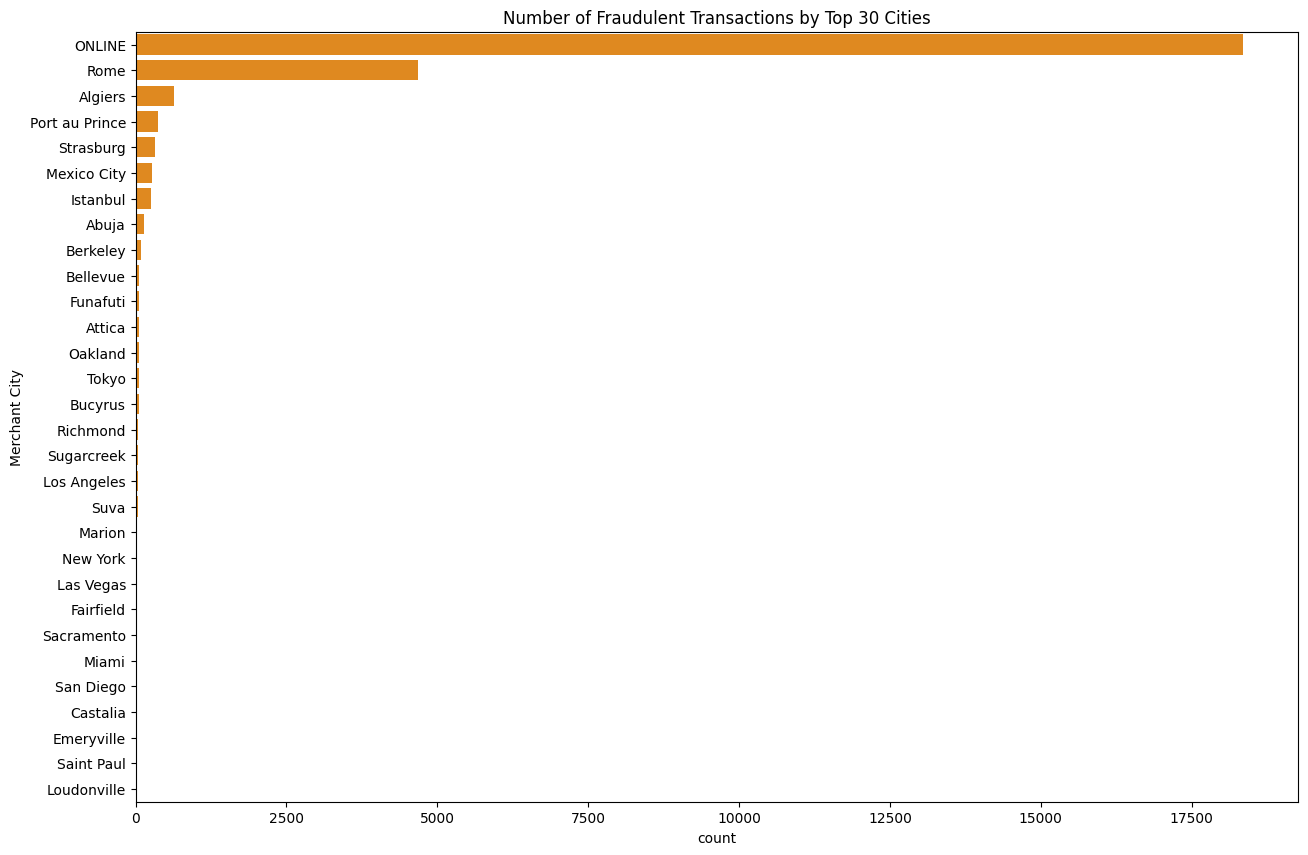

In [ ]:
plt.figure(figsize=(15, 10))
top_cities = fraud_data['Merchant City'].value_counts().head(30).index
sns.countplot(data=fraud_data, y='Merchant City', order=top_cities, color='darkorange')
plt.title('Number of Fraudulent Transactions by Top 30 Cities')
plt.savefig('Number of Fraudulent Transactions by Top 30 Cities.jpg', dpi=600)
plt.show()

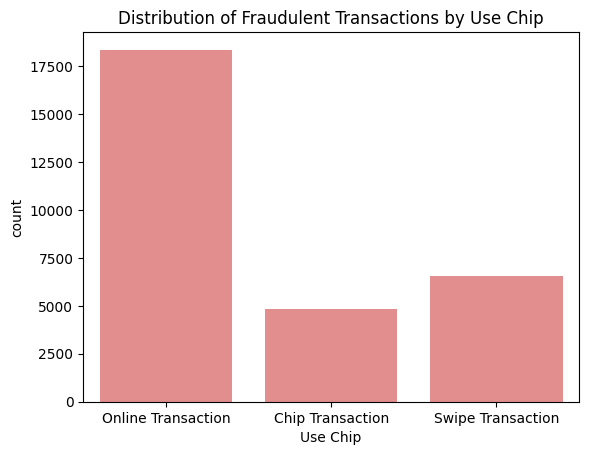

In [ ]:
sns.countplot(data=fraud_data, x='Use Chip', color='lightcoral')
plt.title('Distribution of Fraudulent Transactions by Use Chip')
plt.show()

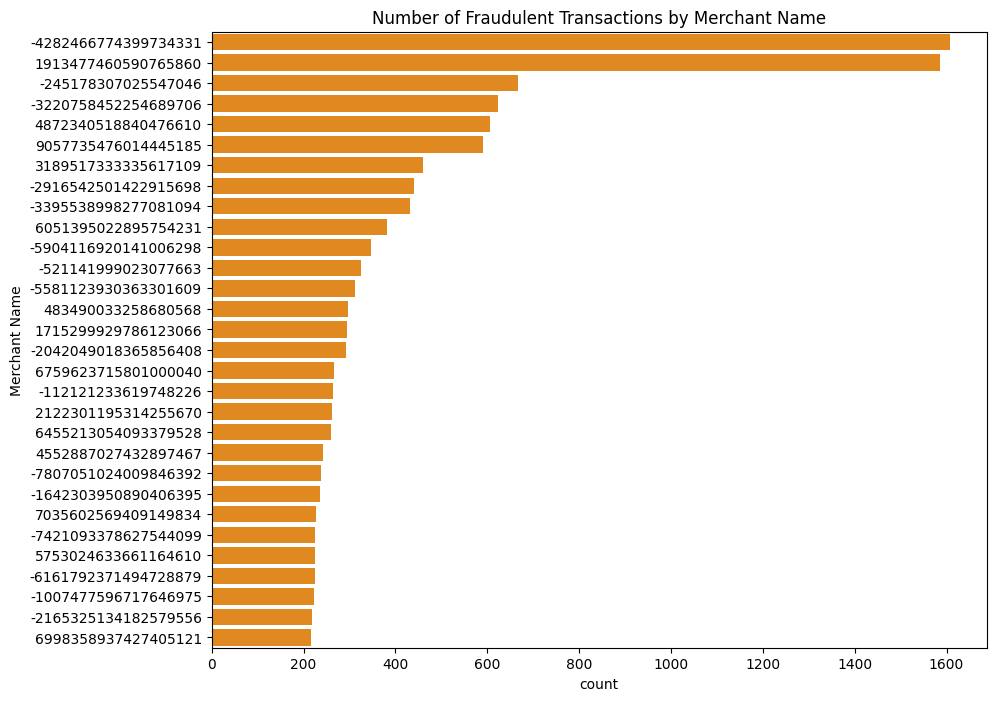

In [ ]:
plt.figure(figsize=(10, 8))
top_names = fraud_data['Merchant Name'].value_counts().head(30).index
sns.countplot(data=fraud_data, y='Merchant Name', order=top_names, color='darkorange')
plt.title('Number of Fraudulent Transactions by Merchant Name')
plt.savefig('Number of Fraudulent Transactions by Merchant Name.jpg', dpi=600)
plt.show()

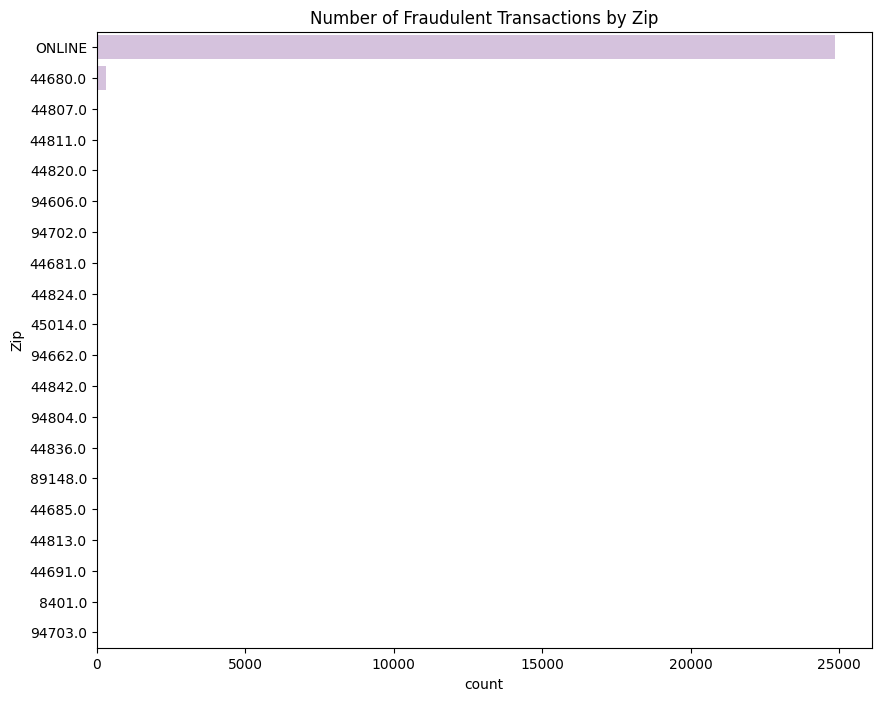

In [ ]:
plt.figure(figsize=(10, 8))
top_names = fraud_data['Zip'].value_counts().head(20).index
#top_names = top_names.drop('ONLINE')
sns.countplot(data=fraud_data, y='Zip', order=top_names, color='#D7BDE2')
plt.title('Number of Fraudulent Transactions by Zip')
#plt.savefig('Number of Fraudulent Transactions by Merchant Name.jpg', dpi=600)
plt.show()